Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 11s 75ms/step - loss: 3.5406 - acc: 0.6667 - val_loss: 1.8031 - val_acc: 0.8056

Epoch 00001: val_acc improved from -inf to 0.80556, saving model to wight_cnn_model2_ph2_20%val_last.h5
Epoch 2/50
144/144 [==============================] - 4s 27ms/step - loss: 2.5042 - acc: 0.6875 - val_loss: 2.0012 - val_acc: 0.7500

Epoch 00002: val_acc did not improve from 0.80556
Epoch 3/50
144/144 [==============================] - 4s 27ms/step - loss: 1.5161 - acc: 0.7569 - val_loss: 1.4038 - val_acc: 0.7500

Epoch 00003: val_acc did not improve from 0.80556
Epoch 4/50
144/144 [==============================] - 4s 27ms/step - loss: 2.0042 - acc: 0.6667 - val_loss: 1.1708 - val_acc: 0.7222

Epoch 00004: val_acc did not improve from 0.80556
Epoch 5/50
144/144 [==============================] - 4s 27ms/step - loss: 1.1258 - acc: 0.6319 - val_loss: 1.9927 - val_acc: 0.5000

Epoch 00005: val_acc did not i

144/144 [==============================] - 4s 27ms/step - loss: 0.4075 - acc: 0.8750 - val_loss: 0.4150 - val_acc: 0.8333

Epoch 00043: val_acc did not improve from 0.94444
Epoch 44/50
144/144 [==============================] - 4s 26ms/step - loss: 0.3935 - acc: 0.8611 - val_loss: 0.4055 - val_acc: 0.8889

Epoch 00044: val_acc did not improve from 0.94444
Epoch 45/50
144/144 [==============================] - 4s 26ms/step - loss: 0.3580 - acc: 0.8889 - val_loss: 0.3841 - val_acc: 0.9167

Epoch 00045: val_acc did not improve from 0.94444
Epoch 46/50
144/144 [==============================] - 4s 26ms/step - loss: 0.3188 - acc: 0.9028 - val_loss: 0.4314 - val_acc: 0.9167

Epoch 00046: val_acc did not improve from 0.94444
Epoch 47/50
144/144 [==============================] - 4s 26ms/step - loss: 0.3261 - acc: 0.9097 - val_loss: 0.4093 - val_acc: 0.8889

Epoch 00047: val_acc did not improve from 0.94444
Epoch 48/50
144/144 [==============================] - 4s 26ms/step - loss: 0.4019 - ac

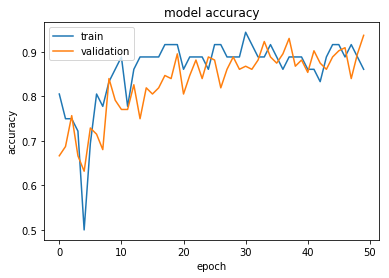

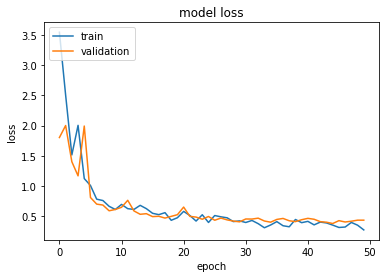

{0: 1.0}
{0: 1.0, 1: 1.0}
{0: 1.0, 1: 1.0, 2: 1.0}


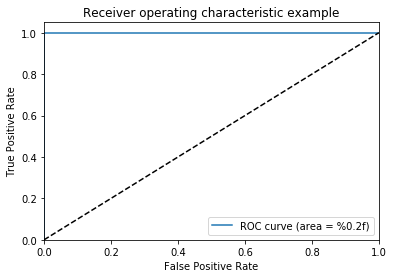

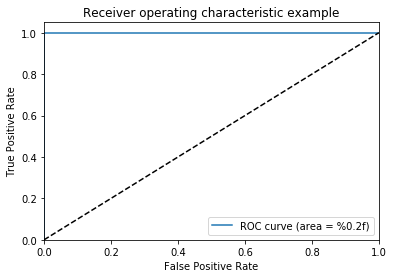

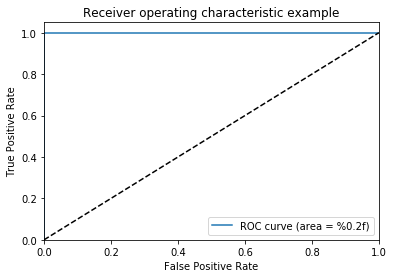

In [67]:
# importing the libraries
import numpy as np
import tensorflow as tf
import os
import pickle
from keras.callbacks import ModelCheckpoint
import sklearn
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten





#loading the data
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)




# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
y_test= keras.utils.to_categorical(y_test, num_classes=3)



reg=keras.regularizers.l2(0.0005)

#reg=keras.regularizers.l1_l2(l1=0.005, l2=0.005)
#reg=None



#build the CNN model
model = Sequential()

model.add(Conv2D(560, (3, 3), activation ='relu', input_shape=(200, 200, 3), kernel_regularizer=reg, 
                 bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(280, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(140, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Conv2D(70, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), strides = 1, activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation ='relu'))

model.add(Dropout(0.4))
model.add(Dense(3, activation ='softmax'))



#combile the model
model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          #shuffle=False
                          )


#load the weights of the best model from perviuose training
model.load_weights('weights_cnn_model2_6.h5')


#save the weights of the best model 
cb= ModelCheckpoint(filepath='wight_cnn_model2_ph2_20%val_last.h5',  verbose=1, monitor='val_acc', save_best_only=True, save_weights_only=True)


#fit the model to the data
history=model.fit(X, 
                  one_hot_labels,
                  batch_size=10,
                  epochs=50,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=[cb]
                     )


# test the model
score, acc=model.evaluate( X_test, y_test)
print('Test loss')
print(score)
print('Test accuracy')
print(acc)

#calculate the AUC_ROC
y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)



# generate accuracy and loss curves for the training process (history of accuracy and loss)
print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()


In [ ]:
#model.save('CNN_wierd_model_kaggel_dataset.h5')91

#model.save('CNN_wierd_model_ph2_85.h5')

#model.save('CNN_wierd_model_ph2_20%val_94acc.h5') 

In [68]:
model.save('CNN_wierd_model_ph2_20%val_94acc_1_ROC.h5')

confusion matrix of : 
[[7 0 1]
 [0 7 0]
 [0 0 5]]
 confusion matrix, without normalized
[[7 0 1]
 [0 7 0]
 [0 0 5]]


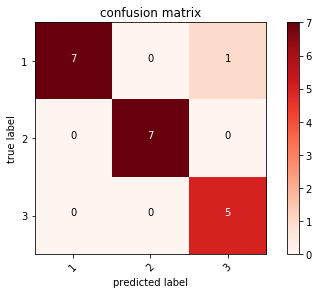

In [74]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools 
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("confusion matrix of : ")
print(cm)

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='confusion matrix',
                         cmap=plt.cm.Reds):
    # this funcation print & plots confusion matrix
    # normalize can be applied by  normalize=True,
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm= cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print(" confusion matrix, without normalized")
    print(cm)
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

    '''input to confusion_matrix must be a list of predictions, not OHEs (one hot encodings). 
    Call argmax on your y_test and y_pred, and you should get what you expect.'''

from sklearn.utils.multiclass import unique_labels
classes = [1,2,3]
plot_confusion_matrix(cm,classes)
